In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

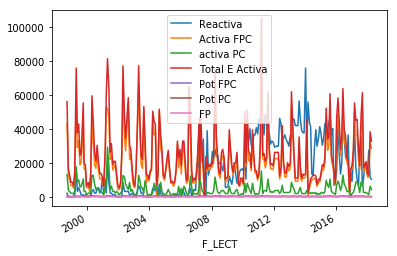

In [186]:
df = pd.read_excel('consumo.xlsx', index_col='F_LECT')
df.head()
df.plot()

In [187]:
columns_to_keep = ['FP',
                   'Reactiva']
df = df[columns_to_keep]
df.rename(columns={'FP': 'fp', 'Reactiva': 'e_reactiva'}, inplace=True)
df.index.names = ['date']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 237


,fp,e_reactiva
date,,
1998-09-10,0.999308,2081.0
1998-10-11,1.000000,0.0
1998-11-10,1.000000,0.0
1998-12-11,1.000000,0.0
1999-01-14,1.000000,0.0


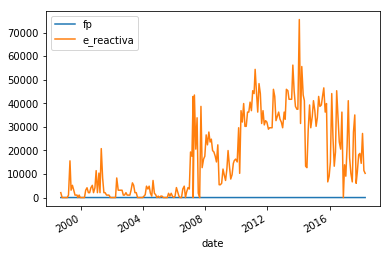

In [188]:
df.plot()

In [190]:
x = np.array(df['e_reactiva'])
y = np.array(df['fp'])

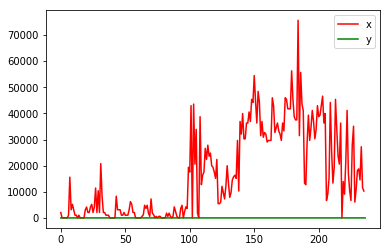

In [191]:
plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend()

In [192]:
distances = np.zeros((len(y), len(x)))
distances

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [193]:
for i in range(len(y)):
    for j in range(len(x)):
        distances[i,j] = (x[j]-y[i])**2  

In [194]:
distances

array([[4.32640288e+06, 9.98615510e-01, 9.98615510e-01, ...,
        1.32204020e+08, 1.05842958e+08,            nan],
       [4.32640000e+06, 1.00000000e+00, 1.00000000e+00, ...,
        1.32204004e+08, 1.05842944e+08,            nan],
       [4.32640000e+06, 1.00000000e+00, 1.00000000e+00, ...,
        1.32204004e+08, 1.05842944e+08,            nan],
       ...,
       [4.32657717e+06, 9.16635137e-01, 9.16635137e-01, ...,
        1.32204983e+08, 1.05843820e+08,            nan],
       [4.32659199e+06, 9.09829870e-01, 9.09829870e-01, ...,
        1.32205065e+08, 1.05843894e+08,            nan],
       [4.32640000e+06, 1.00000000e+00, 1.00000000e+00, ...,
        1.32204004e+08, 1.05842944e+08,            nan]])

In [195]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();

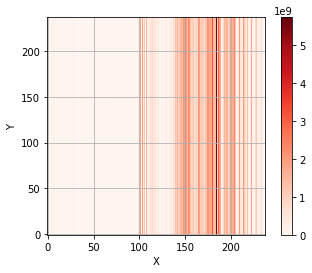

In [196]:
distance_cost_plot(distances)


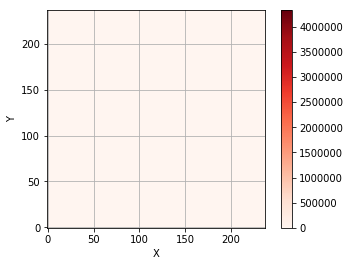

In [197]:
accumulated_cost = np.zeros((len(y), len(x)))
accumulated_cost[0,0] = distances[0,0]
distance_cost_plot(accumulated_cost)

In [198]:
for i in range(1, len(x)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]

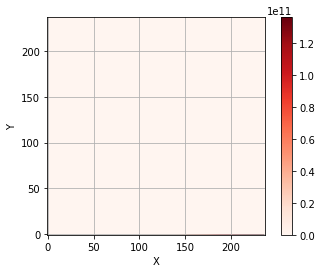

In [199]:
distance_cost_plot(accumulated_cost)


In [200]:
for i in range(1, len(y)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]  

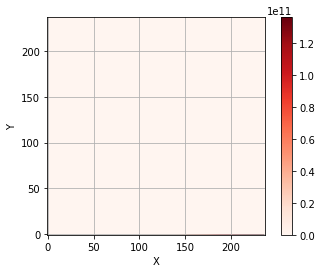

In [201]:
distance_cost_plot(accumulated_cost)


In [202]:
for i in range(1, len(y)):
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]

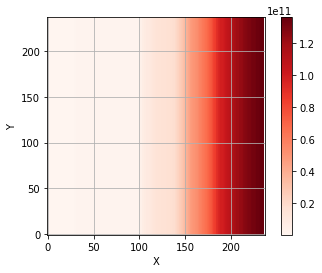

In [203]:
distance_cost_plot(accumulated_cost)


In [204]:
path = [[len(x)-1, len(y)-1]]
i = len(y)-1
j = len(x)-1
while i>0 and j>0:
    if i==0:
        j = j - 1
    elif j==0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j-1
        else:
            i = i - 1
            j= j- 1
    path.append([j, i])
path.append([0,0])
path

[[236, 236],
 [235, 236],
 [234, 236],
 [233, 236],
 [232, 236],
 [231, 236],
 [230, 236],
 [229, 236],
 [228, 236],
 [227, 236],
 [226, 236],
 [225, 236],
 [224, 236],
 [223, 236],
 [222, 236],
 [221, 236],
 [220, 236],
 [219, 236],
 [218, 235],
 [218, 234],
 [218, 233],
 [218, 232],
 [218, 231],
 [218, 230],
 [218, 229],
 [218, 228],
 [218, 227],
 [218, 226],
 [218, 225],
 [218, 224],
 [218, 223],
 [218, 222],
 [218, 221],
 [218, 220],
 [218, 219],
 [217, 218],
 [216, 218],
 [215, 218],
 [214, 218],
 [213, 218],
 [212, 218],
 [211, 218],
 [210, 218],
 [209, 218],
 [208, 218],
 [207, 218],
 [206, 218],
 [205, 218],
 [204, 218],
 [203, 218],
 [202, 218],
 [201, 218],
 [200, 218],
 [199, 218],
 [198, 218],
 [197, 218],
 [196, 218],
 [195, 218],
 [194, 218],
 [193, 218],
 [192, 218],
 [191, 218],
 [190, 218],
 [189, 218],
 [188, 218],
 [187, 218],
 [186, 218],
 [185, 218],
 [184, 218],
 [183, 218],
 [182, 218],
 [181, 218],
 [180, 218],
 [179, 218],
 [178, 218],
 [177, 218],
 [176, 218],

In [205]:
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]

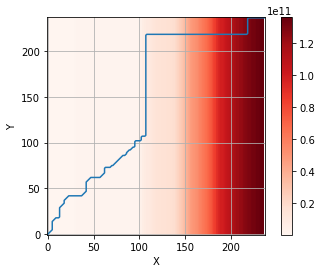

In [206]:
distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y);

In [207]:
def path_cost(x, y, accumulated_cost, distances):
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [y, x] in path:
        cost = cost +distances[x, y]
    return path, cost    

In [208]:
path, cost = path_cost(x, y, accumulated_cost, distances)
print(path)
print(cost)

[[236, 236], [235, 236], [234, 236], [233, 236], [232, 236], [231, 236], [230, 236], [229, 236], [228, 236], [227, 236], [226, 236], [225, 236], [224, 236], [223, 236], [222, 236], [221, 236], [220, 236], [219, 236], [218, 235], [218, 234], [218, 233], [218, 232], [218, 231], [218, 230], [218, 229], [218, 228], [218, 227], [218, 226], [218, 225], [218, 224], [218, 223], [218, 222], [218, 221], [218, 220], [218, 219], [217, 218], [216, 218], [215, 218], [214, 218], [213, 218], [212, 218], [211, 218], [210, 218], [209, 218], [208, 218], [207, 218], [206, 218], [205, 218], [204, 218], [203, 218], [202, 218], [201, 218], [200, 218], [199, 218], [198, 218], [197, 218], [196, 218], [195, 218], [194, 218], [193, 218], [192, 218], [191, 218], [190, 218], [189, 218], [188, 218], [187, 218], [186, 218], [185, 218], [184, 218], [183, 218], [182, 218], [181, 218], [180, 218], [179, 218], [178, 218], [177, 218], [176, 218], [175, 218], [174, 218], [173, 218], [172, 218], [171, 218], [170, 218], [16

236 nan : 236 1.0
235 10289.0 : 236 1.0
234 11499.0 : 236 1.0
233 27236.0 : 236 1.0
232 14526.0 : 236 1.0
231 18763.0 : 236 1.0
230 18157.0 : 236 1.0
229 10894.0 : 236 1.0
228 6052.0 : 236 1.0
227 35105.0 : 236 1.0
226 27841.0 : 236 1.0
225 6657.0 : 236 1.0
224 10289.0 : 236 1.0
223 16947.0 : 236 1.0
222 41157.0 : 236 1.0
221 21789.0 : 236 1.0
220 9078.0 : 236 1.0
219 13920.0 : 236 1.0
218 0.0 : 235 0.9538500247504856
218 0.0 : 234 0.9574106420164246
218 0.0 : 233 0.42285450021895726
218 0.0 : 232 0.6756832615527322
218 0.0 : 231 0.7389432237653729
218 0.0 : 230 0.7186163419170597
218 0.0 : 229 0.8411897643611023
218 0.0 : 228 0.9951350231594994
218 0.0 : 227 0.8024552452254218
218 0.0 : 226 0.5462641096205311
218 0.0 : 225 0.9714046735895452
218 0.0 : 224 0.9752607998585512
218 0.0 : 223 0.935284949792395
218 0.0 : 222 0.8010563993797096
218 0.0 : 221 0.780866012326597
218 0.0 : 220 0.8944370430386702
218 0.0 : 219 0.7612653738052858
217 36315.0 : 218 1.0
216 20578.0 : 218 1.0
215 236

61 0.0 : 66 0.9966401564269587
60 0.0 : 65 0.9953870759215387
59 0.0 : 64 0.9972697523025814
58 0.0 : 63 0.9992014861194057
57 2081.0 : 62 1.0
56 2081.0 : 62 1.0
55 5204.0 : 62 1.0
54 6245.0 : 62 1.0
53 3122.0 : 62 1.0
52 1040.0 : 62 1.0
51 1040.0 : 62 1.0
50 1040.0 : 62 1.0
49 2081.0 : 62 1.0
48 1040.0 : 62 1.0
47 1040.0 : 62 1.0
46 3122.0 : 61 1.0
45 3120.0 : 60 1.0
44 3120.0 : 59 1.0
43 8320.0 : 58 1.0
42 0.0 : 57 0.9954985424471338
42 0.0 : 56 0.9962432422904337
42 0.0 : 55 0.9936063057506397
42 0.0 : 54 0.9967293298285473
42 0.0 : 53 0.997055641230736
42 0.0 : 52 0.9980558417251906
42 0.0 : 51 0.9864109971492535
42 0.0 : 50 0.992288873999265
42 0.0 : 49 0.9922824595598452
42 0.0 : 48 0.9993159536625341
42 0.0 : 47 0.9994069820049156
41 0.0 : 46 0.9985685571394278
40 0.0 : 45 0.9958936821292084
39 0.0 : 44 0.9977854408409661
38 0.0 : 43 0.9942079428956475
37 1040.0 : 42 1.0
36 1040.0 : 42 1.0
35 1040.0 : 42 1.0
34 2080.0 : 42 1.0
33 2080.0 : 42 1.0
32 8320.0 : 42 1.0
31 20801.0 : 4

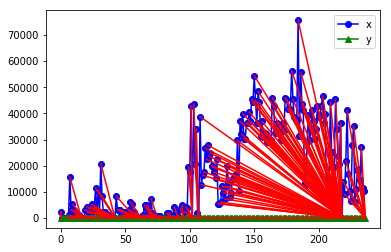

In [209]:
plt.plot(x, 'bo-' ,label='x')
plt.plot(y, 'g^-', label = 'y')
plt.legend();
paths = path_cost(x, y, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    print (map_x, x[map_x], ":", map_y, y[map_y])
    
    plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')

In [210]:
accumulated_cost[0,0] = distances[0,0]
for i in range(1, len(y)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]
for i in range(1, len(x)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1] 
for i in range(1, len(y)):
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]

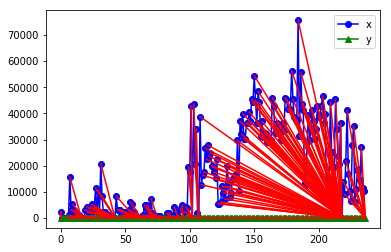

In [211]:
plt.plot(x, 'bo-' ,label='x')
plt.plot(y, 'g^-', label = 'y')
plt.legend();
paths = path_cost(x, y, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    #print map_x, x[map_x], ":", map_y, y[map_y]
    
    plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')